<a href="https://colab.research.google.com/github/Rakeshyrc/Analysis-of-Student-Preferences-Factors-Influencing-University-Selection-EDA-/blob/main/Analysis_of_Universities_project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# **DATA CLEANING**

# **Read csv**

In [ ]:
universities_df = pd.read_csv("/content/university_data.csv")

In [ ]:
universities_df.head()

,ID number,Name,year,ZIP code,Highest degree offered,County name,Longitude location of institution,Latitude location of institution,Religious affiliation,Offers Less than one year certificate,...,Percent of freshmen receiving federal grant aid,Percent of freshmen receiving Pell grants,Percent of freshmen receiving other federal grant aid,Percent of freshmen receiving state/local grant aid,Percent of freshmen receiving institutional grant aid,Percent of freshmen receiving student loan aid,Percent of freshmen receiving federal student loans,Percent of freshmen receiving other loan aid,Endowment assets (year end) per FTE enrollment (GASB),Endowment assets (year end) per FTE enrollment (FASB)
0,100654,Alabama A & M University,2013,35762,Doctor's degree - research/scholarship,Madison County,-86.568502,34.783368,Not applicable,Implied no,...,81.0,81.0,7.0,1.0,32.0,89.0,89.0,1.0,NaN,NaN
1,100663,University of Alabama at Birmingham,2013,35294-0110,Doctor's degree - research/scholarship and pro...,Jefferson County,-86.809170,33.502230,Not applicable,Implied no,...,36.0,36.0,10.0,0.0,60.0,56.0,55.0,5.0,24136.0,NaN
2,100690,Amridge University,2013,36117-3553,Doctor's degree - research/scholarship and pro...,Montgomery County,-86.174010,32.362609,Churches of Christ,Implied no,...,90.0,90.0,0.0,40.0,90.0,100.0,100.0,0.0,NaN,302.0
3,100706,University of Alabama in Huntsville,2013,35899,Doctor's degree - research/scholarship and pro...,Madison County,-86.638420,34.722818,Not applicable,Yes,...,31.0,31.0,4.0,1.0,63.0,46.0,46.0,3.0,11502.0,NaN
4,100724,Alabama State University,2013,36104-0271,Doctor's degree - research/scholarship and pro...,Montgomery County,-86.295677,32.364317,Not applicable,Implied no,...,76.0,76.0,13.0,11.0,34.0,81.0,81.0,0.0,13202.0,NaN


#**Data Cleaning and Formatting**

In [ ]:
universities_df.shape

(1534, 145)

In [ ]:
universities_df.info(max_cols = len(universities_df))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Data columns (total 145 columns):
 #    Column                                                                                  Non-Null Count  Dtype  
---   ------                                                                                  --------------  -----  
 0    ID number                                                                               1534 non-null   int64  
 1    Name                                                                                    1534 non-null   object 
 2    year                                                                                    1534 non-null   int64  
 3    ZIP code                                                                                1534 non-null   object 
 4    Highest degree offered                                                                  1534 non-null   object 
 5    County name                                                 

In [ ]:
universities_df.isna().sum().sort_values(ascending = False)

Endowment assets (year end) per FTE enrollment (GASB)      1018
SAT Writing 25th percentile score                           820
SAT Writing 75th percentile score                           820
Number of first-time undergraduates - foreign countries     623
Percent of first-time undergraduates - out-of-state         623
                                                           ... 
Level of institution                                          0
Control of institution                                        0
Historically Black College or University                      0
Tribal college                                                0
State abbreviation                                            0
Length: 145, dtype: int64

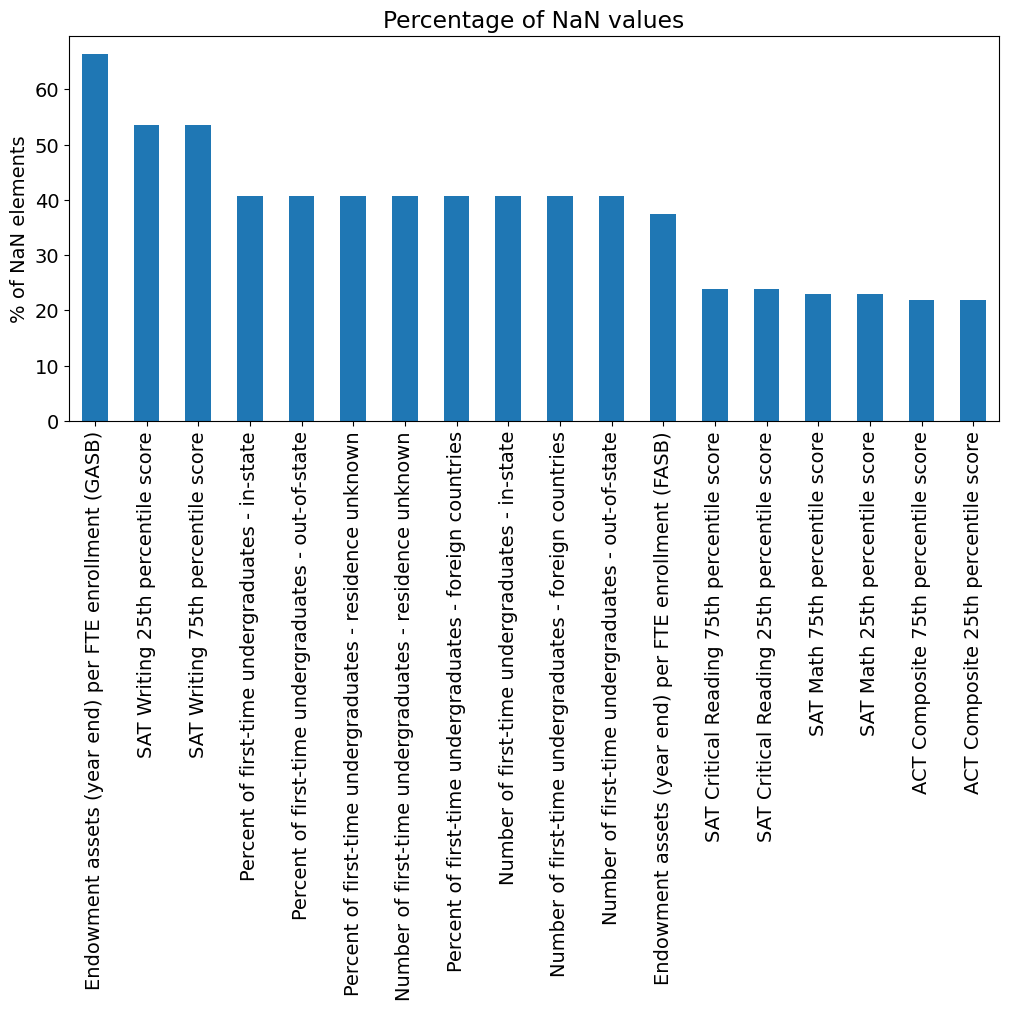

In [ ]:
perc_nan=universities_df.isna().sum()/len(universities_df)*100
ax=perc_nan[perc_nan>=20].sort_values(ascending=False).plot.bar(title='Percentage of NaN values',figsize=(12,5));
ax.set_ylabel('% of NaN elements');

In [ ]:
colum_off = universities_df.isna().sum()[universities_df.isna().sum() >= (0.2 * len(universities_df))]
list_colum_off = colum_off.index.to_list()
univclean_df = universities_df.copy()

In above step We will be removing columns that contain 20% or more missing values (NaNs). These columns cannot be used as reliable representative values due to the significant amount of missing data. By doing this, we aim to ensure the integrity and accuracy of our data analysis and decision-making process.Before proceeding, I have create a duplicate of the dataframe to preserve the original data while making further modifications

In [ ]:
univclean_df.drop(list_colum_off,axis = 1,inplace = True )

In [ ]:
# Clean up column names
univclean_df.columns = univclean_df.columns.str.replace(' ', '_').str.lower()

# Now update the interesting_columns list with the cleaned column names
interesting_columns = [
    'name', 'year', 'highest_degree_offered', "offers_bachelor's_degree",
    "offers_master's_degree", "offers_doctor's_degree_-_research/scholarship",
    "offers_doctor's_degree_-_professional_practice", 'applicants_total',
    'admissions_total', 'enrolled_total', 'estimated_enrollment,_total',
    'tuition_and_fees,_2013-14', 'total_price_for_in-state_students_living_on_campus_2013-14',
    'total_price_for_out-of-state_students_living_on_campus_2013-14', 'state_abbreviation',
    'control_of_institution', 'full-time_enrollment', 'part-time_enrollment', 'undergraduate_enrollment',
    'graduate_enrollment', 'full-time_undergraduate_enrollment', 'part-time_undergraduate_enrollment',
    'percent_of_total_enrollment_that_are_women',
    'percent_of_undergraduate_enrollment_that_are_women',
    'percent_of_graduate_enrollment_that_are_women',
    'graduation_rate_-_bachelor_degree_within_4_years,_total',
    'graduation_rate_-_bachelor_degree_within_5_years,_total',
    'graduation_rate_-_bachelor_degree_within_6_years,_total',
]

# Filter the DataFrame with the updated interesting_columns
univclean_df = univclean_df[interesting_columns]

# Display rows where 'enrolled_total' has NaN values
enrollment_nan_df = univclean_df[univclean_df['enrolled_total'].isna()][['name', 'applicants_total', 'admissions_total', 'enrolled_total', 'estimated_enrollment,_total']]
print(enrollment_nan_df)


                                               name  applicants_total  \
2                                Amridge University               NaN   
6                           Athens State University               NaN   
10                        Concordia College Alabama               NaN   
11                              Faulkner University               NaN   
16                                    Miles College               NaN   
...                                             ...               ...   
1526                         University of the West               NaN   
1527    Averett University-Non-Traditional Programs               NaN   
1528                                  LIU Riverhead               NaN   
1531                       Ottawa University-Online               NaN   
1533  Polytechnic University of Puerto Rico-Orlando               NaN   

      admissions_total  enrolled_total  estimated_enrollment,_total  
2                  NaN             NaN               

In [ ]:
# Finding the index of the row for 'University of North Georgia'
a = univclean_df[univclean_df['name'] == 'University of North Georgia'].index[0]

# Finding the index of the row for 'Texas A & M University-Galveston'
b = univclean_df[univclean_df['name'] == 'Texas A & M University-Galveston'].index[0]


In [ ]:
univclean_df = univclean_df.drop([a,b],axis =0)

In [ ]:
print(univclean_df.shape[1],universities_df.shape[1],univclean_df.shape[0],universities_df.shape[0])

28 145 1532 1534


# **check for invalid values**

In [ ]:
col = univclean_df.select_dtypes(include = ['float64, int64']).columns

In [ ]:
lt = list()
for i in col:
    y = any(x<0 in univclean_df[i])
    if y is True:
        lt.append(y)
print('{} invalid values in dataframe'.format(len(lt)))


0 invalid values in dataframe


In [ ]:
univclean_df.describe()

,year,applicants_total,admissions_total,enrolled_total,"estimated_enrollment,_total","tuition_and_fees,_2013-14",total_price_for_in-state_students_living_on_campus_2013-14,total_price_for_out-of-state_students_living_on_campus_2013-14,full-time_enrollment,part-time_enrollment,undergraduate_enrollment,graduate_enrollment,full-time_undergraduate_enrollment,part-time_undergraduate_enrollment,percent_of_total_enrollment_that_are_women,percent_of_undergraduate_enrollment_that_are_women,percent_of_graduate_enrollment_that_are_women,"graduation_rate_-_bachelor_degree_within_4_years,_total","graduation_rate_-_bachelor_degree_within_5_years,_total","graduation_rate_-_bachelor_degree_within_6_years,_total"
count,1532.0,1377.000000,1377.000000,1377.000000,1532.000000,1497.000000,1400.000000,1400.000000,1532.000000,1532.000000,1532.000000,1532.000000,1532.000000,1532.000000,1532.000000,1522.000000,1269.000000,1476.000000,1476.000000,1476.000000
mean,2013.0,6391.193174,3554.880174,1043.046478,7033.115535,20727.490314,34935.306429,38767.612857,5371.494125,1698.620104,5532.885117,1537.229112,4507.738903,1025.146214,57.911227,57.169514,63.109535,37.450542,49.788618,53.189024
std,0.0,8787.469171,4309.457606,1285.165519,9387.648898,12455.805360,13283.049319,10716.524007,7474.494963,2922.064160,7242.649546,2765.197979,6042.192662,2121.495422,11.784477,11.886220,14.147092,21.949856,20.256726,19.102511
min,2013.0,0.000000,0.000000,0.000000,68.000000,1032.000000,9768.000000,9768.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2013.0,1488.000000,950.000000,287.000000,1497.250000,8542.000000,22487.000000,31128.000000,1199.000000,167.000000,1328.000000,46.750000,1089.500000,87.000000,52.000000,52.000000,55.000000,20.000000,36.000000,40.000000
50%,2013.0,3350.000000,2056.000000,538.000000,3126.000000,20060.000000,34115.000000,37193.500000,2328.000000,671.000000,2487.500000,471.000000,2066.000000,320.500000,58.000000,57.000000,64.000000,34.000000,49.000000,52.500000
75%,2013.0,7016.000000,4203.000000,1246.000000,8376.000000,29992.000000,44835.750000,45907.500000,6080.750000,2062.500000,6394.000000,1737.000000,5207.500000,1082.250000,63.000000,62.000000,72.000000,52.250000,63.000000,66.000000
max,2013.0,72676.000000,35815.000000,10241.000000,79576.000000,49138.000000,64988.000000,64988.000000,50012.000000,40985.000000,51333.000000,29874.000000,40020.000000,37440.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [ ]:
total_zero = univclean_df[univclean_df.loc[0:]==0].count().sum()

In [ ]:
print('{} zero values in this data set'.format(total_zero))

395 zero values in this data set


# **Giving Format**

In [ ]:
univclean_df.columns

Index(['name', 'year', 'highest_degree_offered', 'offers_bachelor's_degree',
       'offers_master's_degree',
       'offers_doctor's_degree_-_research/scholarship',
       'offers_doctor's_degree_-_professional_practice', 'applicants_total',
       'admissions_total', 'enrolled_total', 'estimated_enrollment,_total',
       'tuition_and_fees,_2013-14',
       'total_price_for_in-state_students_living_on_campus_2013-14',
       'total_price_for_out-of-state_students_living_on_campus_2013-14',
       'state_abbreviation', 'control_of_institution', 'full-time_enrollment',
       'part-time_enrollment', 'undergraduate_enrollment',
       'graduate_enrollment', 'full-time_undergraduate_enrollment',
       'part-time_undergraduate_enrollment',
       'percent_of_total_enrollment_that_are_women',
       'percent_of_undergraduate_enrollment_that_are_women',
       'percent_of_graduate_enrollment_that_are_women',
       'graduation_rate_-_bachelor_degree_within_4_years,_total',
       'graduati

In [ ]:
def remove_space(list_headers,characters) : #characters should include ['-',' ']
    new_headers = list()
    for header in list_headers:
        for char in characters:
            if char in header:
                header = header.replace(char,'_')
            header = header
        new_headers.append(header)
    return new_headers

In [ ]:
def remove_sp_char(headers,sp_characters): #special characters include ["''",'/',':'']
    new_headers = list()
    for header in headers:
        for char in sp_characters:
            if char == "-" or char == '/':
                header = header.replace(char,'_')
            if char in header:
                header = header.replace(char,'')
            header = header
        new_headers.append(header)
    return new_headers

In [ ]:
headers = remove_space(univclean_df.columns,[' ',' - '])

In [ ]:
headers = remove_sp_char(headers,[':',"'",'/',',','-'])

In [ ]:
list_new_headers = list()
for header in headers:
    header = header.casefold() #converts the string to lowercase

    if "degrese" in header: #there is one typo in a column
        header = header.replace("degrese", "degrees")
    list_new_headers.append(header)
univclean_df.columns = list_new_headers

In [ ]:
univclean_df.columns

Index(['name', 'year', 'highest_degree_offered', 'offers_bachelors_degree',
       'offers_masters_degree', 'offers_doctors_degree___research_scholarship',
       'offers_doctors_degree___professional_practice', 'applicants_total',
       'admissions_total', 'enrolled_total', 'estimated_enrollment_total',
       'tuition_and_fees_2013_14',
       'total_price_for_in_state_students_living_on_campus_2013_14',
       'total_price_for_out_of_state_students_living_on_campus_2013_14',
       'state_abbreviation', 'control_of_institution', 'full_time_enrollment',
       'part_time_enrollment', 'undergraduate_enrollment',
       'graduate_enrollment', 'full_time_undergraduate_enrollment',
       'part_time_undergraduate_enrollment',
       'percent_of_total_enrollment_that_are_women',
       'percent_of_undergraduate_enrollment_that_are_women',
       'percent_of_graduate_enrollment_that_are_women',
       'graduation_rate___bachelor_degree_within_4_years_total',
       'graduation_rate___bach

In [ ]:
from google.colab import files

file_name = 'cleaned_universities_data.csv'

univclean_df.to_csv(file_name, index=False)


files.download(file_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Now that we've completed the data cleaning process, we can download the cleaned dataset to uncover valuable insights through Exploratory Data Analysis (EDA). This refined dataset can be seamlessly utilized in Tableau, Power BI, Python, or other tools to derive powerful insights and support data-driven decision-making.  

# **Exploratory Data Analysis**

In [ ]:
univclean_df.columns

Index(['name', 'year', 'highest_degree_offered', 'offers_bachelors_degree',
       'offers_masters_degree', 'offers_doctors_degree___research_scholarship',
       'offers_doctors_degree___professional_practice', 'applicants_total',
       'admissions_total', 'enrolled_total', 'estimated_enrollment_total',
       'tuition_and_fees_2013_14',
       'total_price_for_in_state_students_living_on_campus_2013_14',
       'total_price_for_out_of_state_students_living_on_campus_2013_14',
       'state_abbreviation', 'control_of_institution', 'full_time_enrollment',
       'part_time_enrollment', 'undergraduate_enrollment',
       'graduate_enrollment', 'full_time_undergraduate_enrollment',
       'part_time_undergraduate_enrollment',
       'percent_of_total_enrollment_that_are_women',
       'percent_of_undergraduate_enrollment_that_are_women',
       'percent_of_graduate_enrollment_that_are_women',
       'graduation_rate___bachelor_degree_within_4_years_total',
       'graduation_rate___bach

In [ ]:
univclean_df.describe()

,year,applicants_total,admissions_total,enrolled_total,estimated_enrollment_total,tuition_and_fees_2013_14,total_price_for_in_state_students_living_on_campus_2013_14,total_price_for_out_of_state_students_living_on_campus_2013_14,full_time_enrollment,part_time_enrollment,undergraduate_enrollment,graduate_enrollment,full_time_undergraduate_enrollment,part_time_undergraduate_enrollment,percent_of_total_enrollment_that_are_women,percent_of_undergraduate_enrollment_that_are_women,percent_of_graduate_enrollment_that_are_women,graduation_rate___bachelor_degree_within_4_years_total,graduation_rate___bachelor_degree_within_5_years_total,graduation_rate___bachelor_degree_within_6_years_total
count,1532.0,1377.000000,1377.000000,1377.000000,1532.000000,1497.000000,1400.000000,1400.000000,1532.000000,1532.000000,1532.000000,1532.000000,1532.000000,1532.000000,1532.000000,1522.000000,1269.000000,1476.000000,1476.000000,1476.000000
mean,2013.0,6391.193174,3554.880174,1043.046478,7033.115535,20727.490314,34935.306429,38767.612857,5371.494125,1698.620104,5532.885117,1537.229112,4507.738903,1025.146214,57.911227,57.169514,63.109535,37.450542,49.788618,53.189024
std,0.0,8787.469171,4309.457606,1285.165519,9387.648898,12455.805360,13283.049319,10716.524007,7474.494963,2922.064160,7242.649546,2765.197979,6042.192662,2121.495422,11.784477,11.886220,14.147092,21.949856,20.256726,19.102511
min,2013.0,0.000000,0.000000,0.000000,68.000000,1032.000000,9768.000000,9768.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2013.0,1488.000000,950.000000,287.000000,1497.250000,8542.000000,22487.000000,31128.000000,1199.000000,167.000000,1328.000000,46.750000,1089.500000,87.000000,52.000000,52.000000,55.000000,20.000000,36.000000,40.000000
50%,2013.0,3350.000000,2056.000000,538.000000,3126.000000,20060.000000,34115.000000,37193.500000,2328.000000,671.000000,2487.500000,471.000000,2066.000000,320.500000,58.000000,57.000000,64.000000,34.000000,49.000000,52.500000
75%,2013.0,7016.000000,4203.000000,1246.000000,8376.000000,29992.000000,44835.750000,45907.500000,6080.750000,2062.500000,6394.000000,1737.000000,5207.500000,1082.250000,63.000000,62.000000,72.000000,52.250000,63.000000,66.000000
max,2013.0,72676.000000,35815.000000,10241.000000,79576.000000,49138.000000,64988.000000,64988.000000,50012.000000,40985.000000,51333.000000,29874.000000,40020.000000,37440.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [ ]:
high_app_df = univclean_df[['name','applicants_total']].sort_values('applicants_total', ascending = False).head(20)

Text(0, 0.5, 'University')

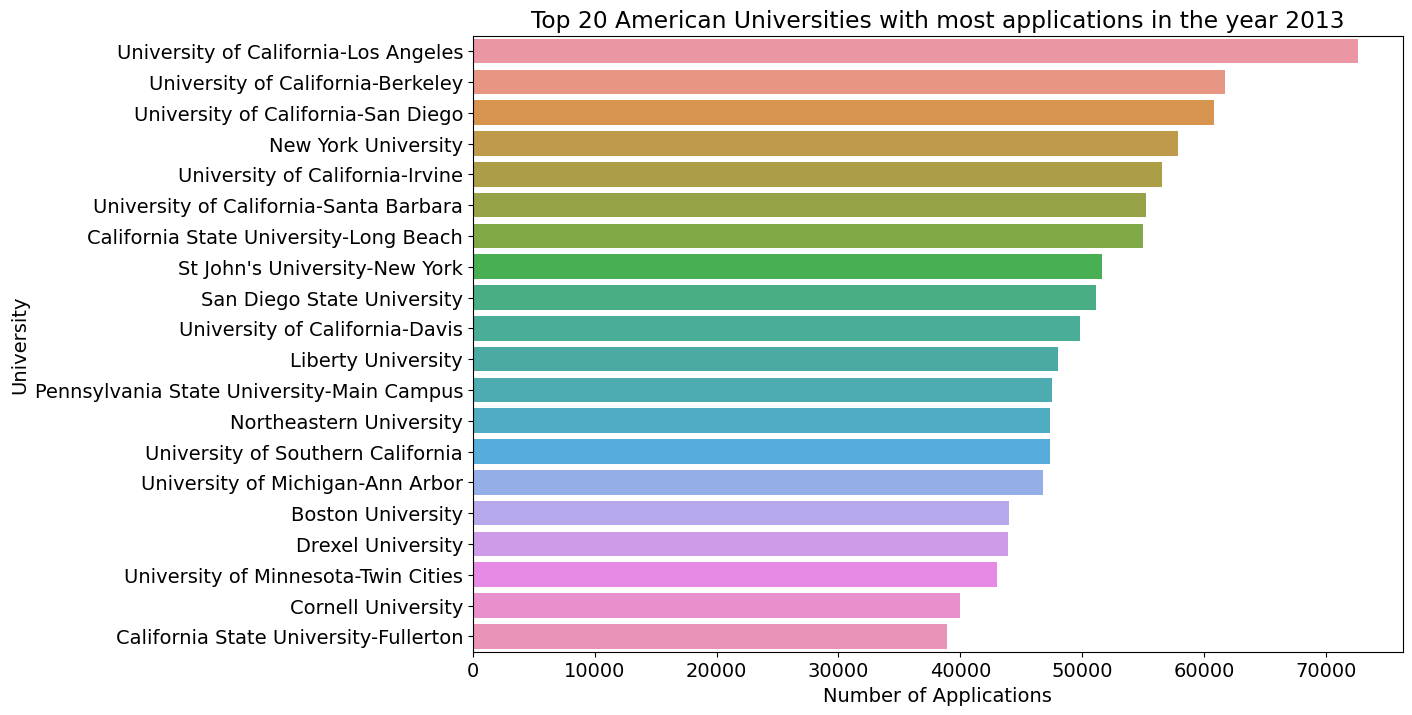

In [ ]:
plt.figure(figsize=(12,8))
matplotlib.rcParams['font.size'] = 14
sns.barplot(x='applicants_total',y='name', data = high_app_df)
plt.title('Top 20 American Universities with most applications in the year 2013')
plt.xlabel('Number of Applications')
plt.ylabel('University')

In this above analysis, we aim to determine whether universities with the highest number of applications are also the most preferred ones by students. While it might seem evident that more applications indicate higher preference, it is essential to consider that one student can submit multiple applications simultaneously. Therefore, we will explore the relationships between the number of applications, admissions, and enrollments to gain insights into students' actual preferences for each university

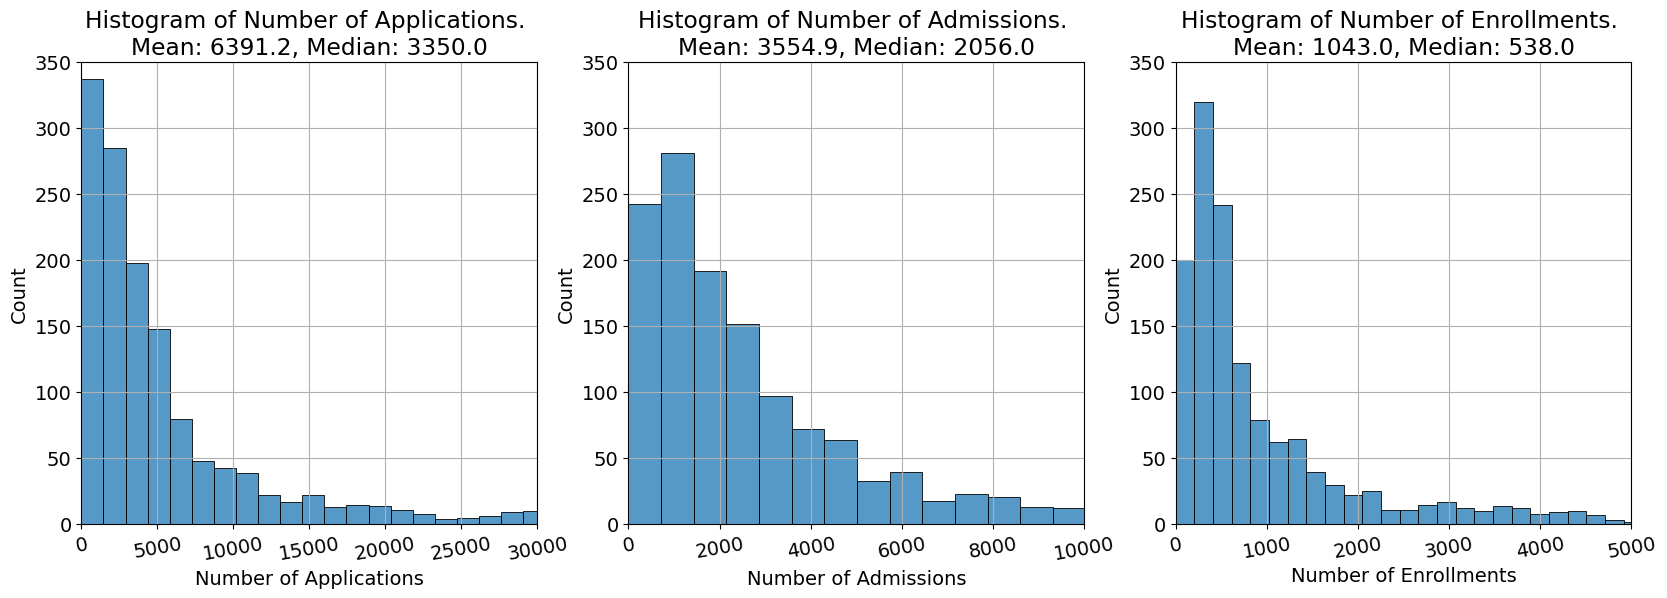

In [ ]:
plt.figure(figsize=(20,6))


plt.subplot(1,3,1)
sns.histplot(univclean_df.applicants_total,bins=50)
plt.title('''Histogram of Number of Applications.
Mean: {:.1f}, Median: {:.1f}'''.format(univclean_df.applicants_total.mean(),univclean_df.applicants_total.median()));
plt.xlabel('Number of Applications')
plt.axis([0,30000,0,350])
plt.xticks(rotation=10)
plt.grid()

plt.subplot(1,3,2)
sns.histplot(univclean_df.admissions_total,bins=50)
plt.title('''Histogram of Number of Admissions.
Mean: {:.1f}, Median: {:.1f}'''.format(univclean_df.admissions_total.mean(),univclean_df.admissions_total.median()));
plt.xlabel('Number of Admissions')
plt.axis([0,10000,0,350])
plt.xticks(rotation=10)
plt.grid()

plt.subplot(1,3,3)
sns.histplot(univclean_df.enrolled_total,bins=50)
plt.title('''Histogram of Number of Enrollments.
Mean: {:.1f}, Median: {:.1f}'''.format(univclean_df.enrolled_total.mean(),univclean_df.enrolled_total.median()));
plt.xlabel('Number of Enrollments')
plt.axis([0,5000,0,350])
plt.xticks(rotation=10)
plt.grid()

the dataset reveals variations in the number of applications and admissions among different universities, with some institutions attracting a larger pool of applicants and others accepting a more substantial number of students. The high rate of admissions in certain universities could be an appealing factor for prospective students looking to increase their chances of acceptance.

# Q. Do students prefer universities with high number of applications?
# Q. Do students prefer universities with high admission rate?

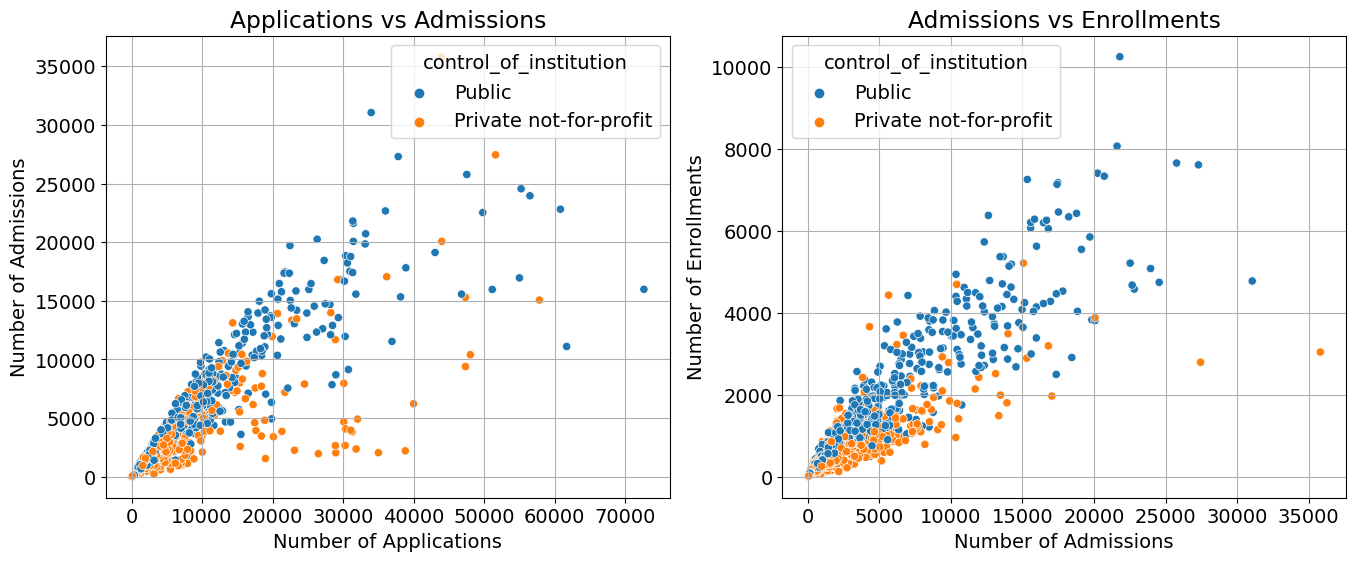

In [ ]:
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
plt.title('Applications vs Admissions')
sns.scatterplot(y=univclean_df.admissions_total, x=univclean_df.applicants_total, hue= univclean_df.control_of_institution)
plt.xlabel('Number of Applications')
plt.ylabel('Number of Admissions')
plt.grid()

plt.subplot(1,2,2)
plt.title('Admissions vs Enrollments')
sns.scatterplot(x=univclean_df.admissions_total, y=univclean_df.enrolled_total, hue= univclean_df.control_of_institution)
plt.xlabel('Number of Admissions')
plt.ylabel('Number of Enrollments')
plt.grid()


From the first scatterplot, we notice a general trend where universities with a high number of applications also tend to have a high rate of admissions, and vice versa. However, there are exceptions, particularly among some private universities that receive many applications but admit only a small number of students, indicating a low acceptance rate and a more selective admissions process.

The second scatterplot reveals a positive correlation between the number of admissions and the enrollment rate. Universities with higher admissions numbers generally have higher enrollment rates, suggesting that a significant proportion of admitted students choose to enroll.

To gain more meaningful insights, we will calculate the admission rate and enrollment rate for universities based on the provided data.

In [ ]:
univclean_df['acceptance_rate'] =(univclean_df.admissions_total/univclean_df.applicants_total* 100)
univclean_df['enrollment_rate'] =(univclean_df.enrolled_total/univclean_df.admissions_total* 100)

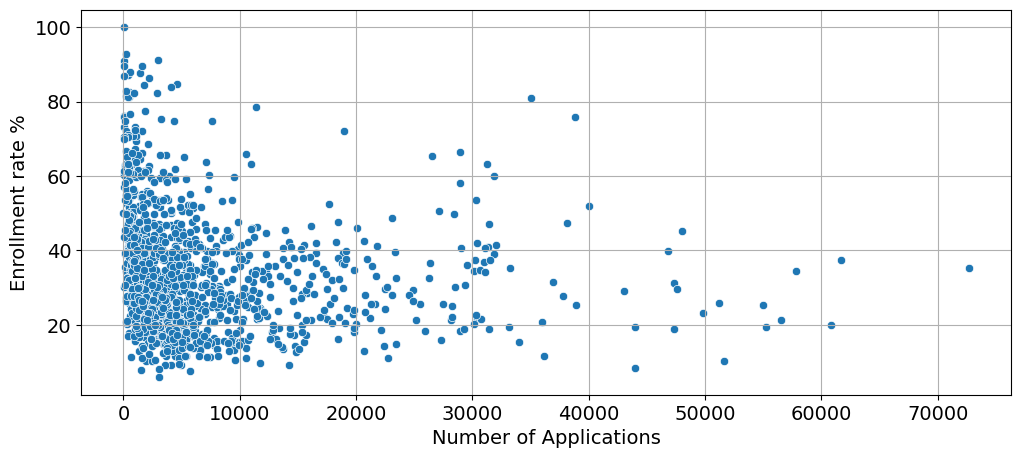

In [ ]:
plt.figure(figsize = (12,5))
sns.scatterplot(x ='applicants_total' , y = 'enrollment_rate' , data = univclean_df)
plt.xlabel('Number of Applications')
plt.ylabel('Enrollment rate %')
plt.grid()


The figure illustrates a strong tendency where universities with a lower number of applications often have a higher enrollment rate. While there are exceptions, this pattern suggests that a high number of applications does not necessarily indicate that a university is preferred among students.

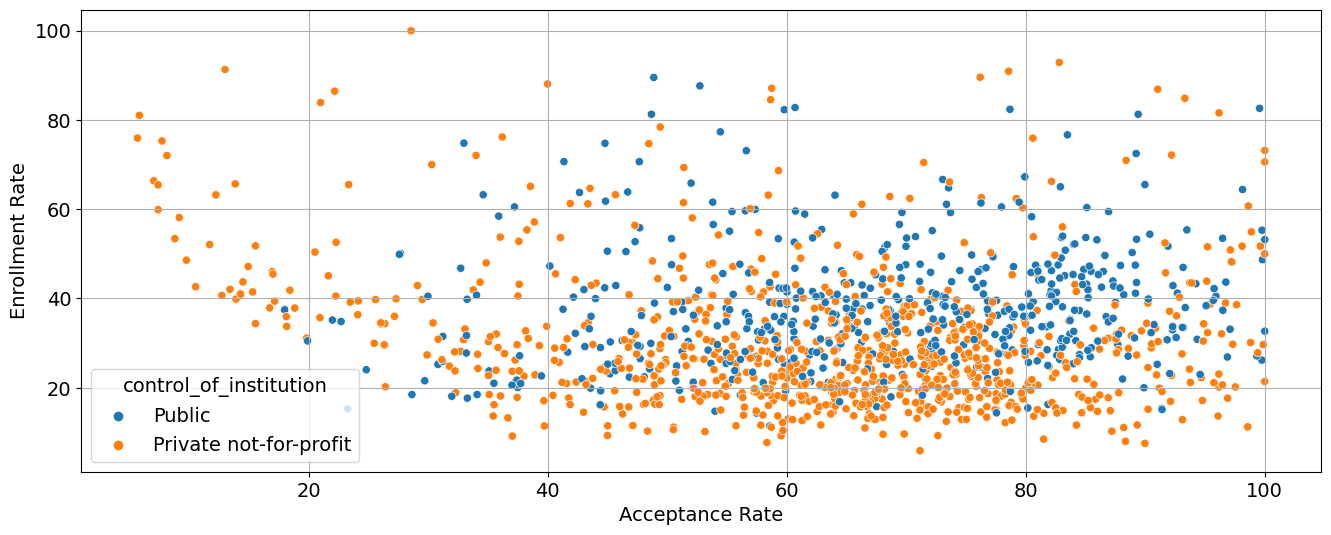

In [ ]:
plt.figure(figsize = (16,6))
sns.scatterplot(x = univclean_df.acceptance_rate,y = univclean_df.enrollment_rate, hue = univclean_df.control_of_institution)
plt.xlabel('Acceptance Rate')
plt.ylabel('Enrollment Rate')
plt.grid()

Upon analyzing the data, it becomes evident that for universities with high acceptance rates, the enrollment rates show considerable variation. This suggests that acceptance rate might not strongly influence students' preferences when choosing a university.

However, a different pattern emerges for universities with low acceptance rates. In this bracket, the enrollment rate is consistently above 40%, and most of the institutions in this category are private universities. This observation leads to the conclusion that most public colleges tend to have acceptance rates higher than 50%.

Furthermore, it is notable that when students are accepted into universities with low acceptance rates, they tend to enroll straightforwardly, without significant fluctuations in enrollment rates.

In summary, while high acceptance rates may not significantly impact student preferences, low acceptance rates seem to influence students' decisions, especially when it comes to private universities where acceptance is competitive but enrollment rates remain relatively high. Further analysis will be conducted to explore this trend in more detail

In [ ]:
high_acceptance = univclean_df[univclean_df.acceptance_rate.notnull()][['name','acceptance_rate','enrollment_rate']].sort_values('acceptance_rate',ascending = False).head(10)
low_acceptance = univclean_df[univclean_df.acceptance_rate.notnull()][['name','acceptance_rate','enrollment_rate']].sort_values('acceptance_rate', ascending= True).head(10)

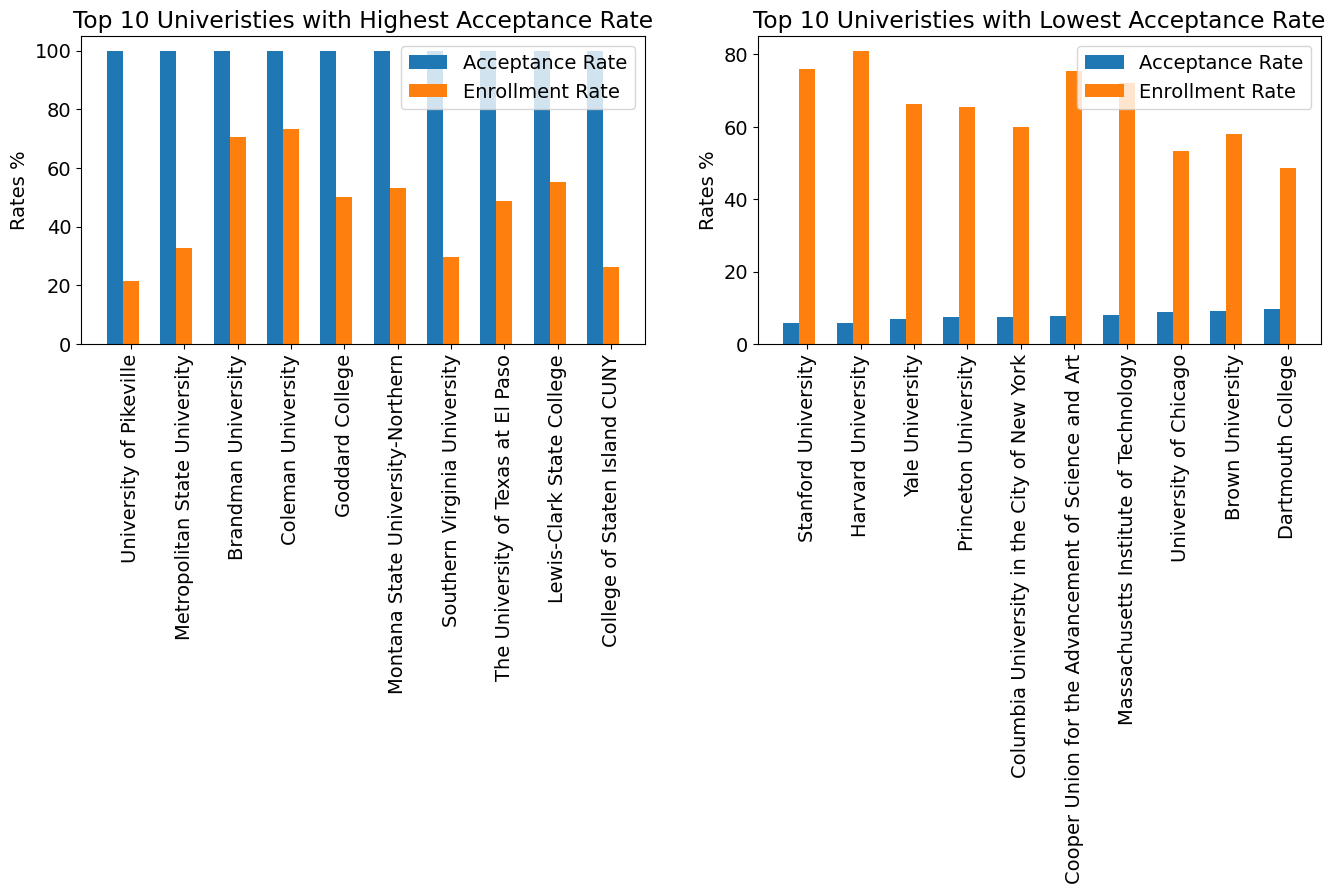

In [ ]:
plt.figure(figsize = (16,4))

plt.subplot(1,2,1)
ind = np.arange(len(high_acceptance))
width = 0.30

plt.bar(ind, high_acceptance.acceptance_rate, width, label = 'Acceptance Rate')
plt.bar(ind+ width, high_acceptance.enrollment_rate, width, label = 'Enrollment Rate')
plt.title('Top 10 Univeristies with Highest Acceptance Rate')
plt.ylabel('Rates %')
plt.xticks(ind + width, high_acceptance.name.values, rotation = 90)
plt.legend(loc = 'best')

plt.subplot(1,2,2)
ind = np.arange(len(low_acceptance))
width = 0.30

plt.bar(ind, low_acceptance.acceptance_rate, width, label = 'Acceptance Rate')
plt.bar(ind+ width, low_acceptance.enrollment_rate, width, label = 'Enrollment Rate')
plt.title('Top 10 Univeristies with Lowest Acceptance Rate')
plt.ylabel('Rates %')
plt.xticks(ind + width, low_acceptance.name.values, rotation = 90)
plt.legend(loc = 'best')


We see that there is no clear pattern of enrollmenr rates of universitites having high admission rates.

We can be sure that students' preference is not based on how easy it is for them to to be admitted..

# Q. Do students prefer public or private universities?

In [ ]:
#splitting number of applications according to their type of control : public or private
uni_private = univclean_df[univclean_df.control_of_institution == 'Private not-for-profit']
uni_private = uni_private[uni_private.applicants_total.notnull()]

uni_public = univclean_df[univclean_df.control_of_institution == 'Public']
uni_public = uni_public[uni_public.applicants_total.notnull()]

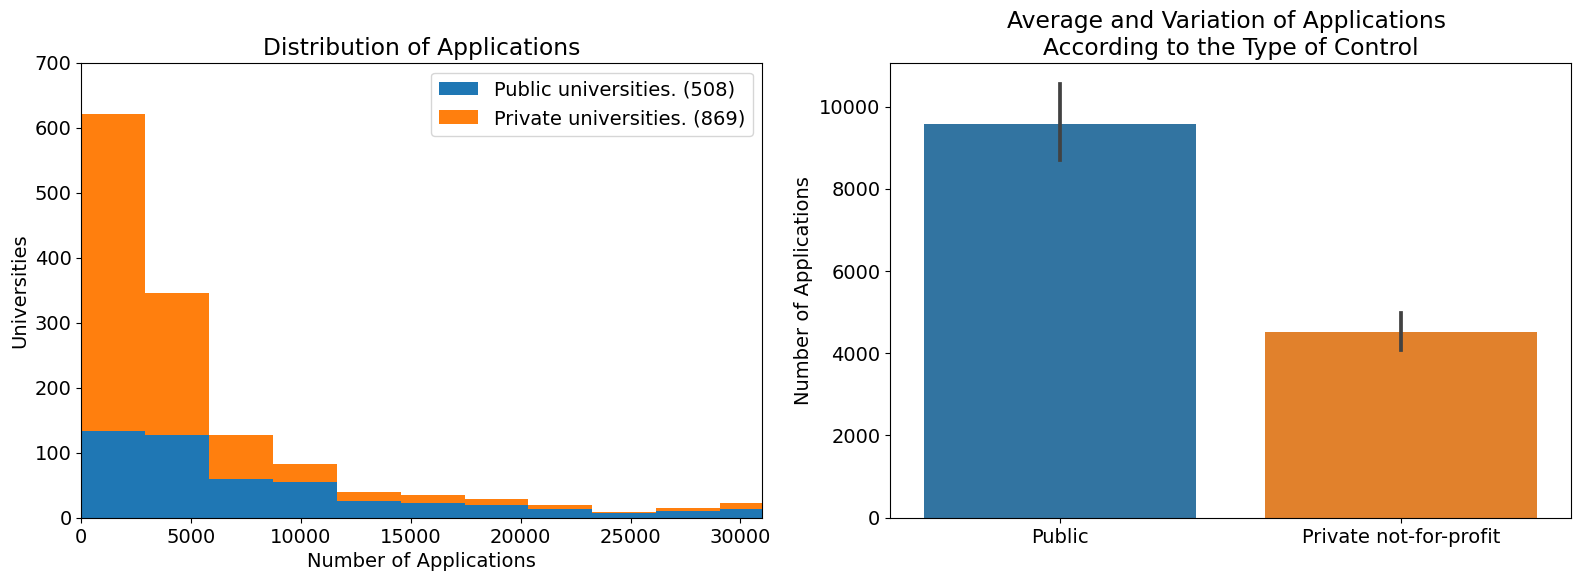

In [ ]:
plt.figure(figsize = (16,6))

plt.subplot(1,2,1)
plt.hist([uni_public.applicants_total, uni_private.applicants_total], stacked = True, bins =25)
plt.axis([0,31000,0,700])
plt.title('Distribution of Applications')
plt.xlabel('Number of Applications')
plt.ylabel('Universities')
plt.legend(['Public universities. ({})'.format(len(uni_public)),'Private universities. ({})'.format(len(uni_private))]);

plt.subplot(1,2,2)
sns.barplot(x=univclean_df.control_of_institution,y=univclean_df.applicants_total);
plt.title('''Average and Variation of Applications
According to the Type of Control''')
plt.xlabel('')
plt.ylabel('Number of Applications');
plt.tight_layout(pad=1)


The dataset reveals that in 2013, public universities received an average of around 9000 applications, which is nearly double the average of approximately 4000 applications received by private universities. It's essential to note that the dataset includes 508 public universities and 868 private universities.

Additionally, the figure on the right indicates that the variation in the number of applications to public universities is significantly higher than that of private universities. Despite this variation, the average number of applications for public universities remains notably higher than that for private universities.

To further investigate this trend, we will determine the maximum and minimum values of applications for both public and private universities

In [ ]:
print('The minimum number of applications for private universities was {}; whereas, for public universities was {}.'.format(int(uni_private.applicants_total.min()),int(uni_public.applicants_total.min())))
print('The maximum number of applications for private universities was {}; whereas, for public universities was {}.'.format(int(uni_private.applicants_total.max()), int(uni_public.applicants_total.max())))


The minimum number of applications for private universities was 0; whereas, for public universities was 193.
The maximum number of applications for private universities was 57845; whereas, for public universities was 72676.


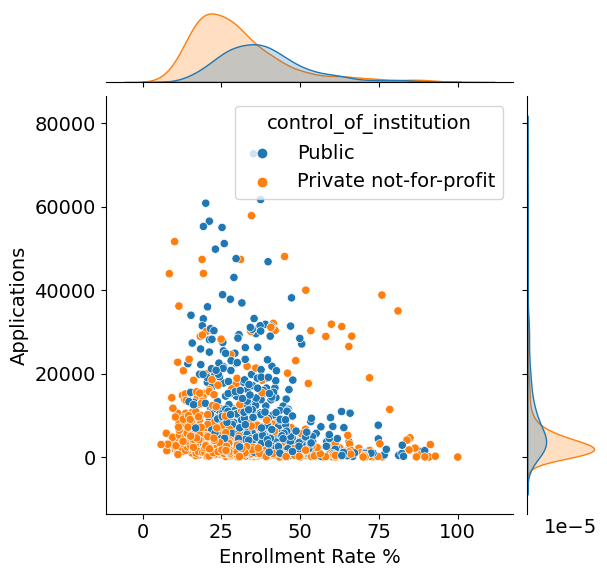

In [ ]:
g=sns.jointplot(x=univclean_df.enrollment_rate,y=univclean_df.applicants_total,hue=univclean_df.control_of_institution,height=6);
g=(g.set_axis_labels("Enrollment Rate %","Applications"));


By examining the figure, it becomes apparent that, on average, the enrollment rate is higher for public universities compared to private universities. Considering this finding along with the earlier observations, we can confidently conclude that there is indeed a preference among students for public universities

# Q: Do students prefer universities with low tuition and fees?

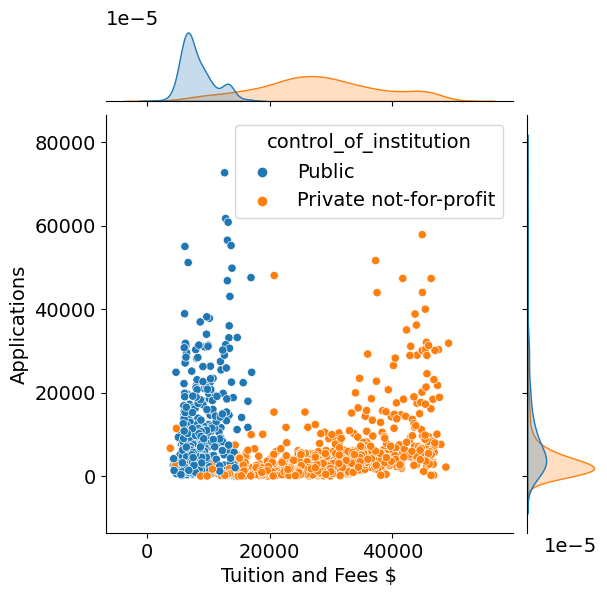

In [ ]:
g=sns.jointplot(x=univclean_df.tuition_and_fees_2013_14,y=univclean_df.applicants_total,hue=univclean_df.control_of_institution,height=6);
g=(g.set_axis_labels("Tuition and Fees $","Applications"))


Upon reviewing the figure, it becomes evident that the most affordable universities, in terms of tuition and fees, receive the highest number of applications. This observation leads us to consider the possibility of a relationship between tuition costs and students' preferences. To ascertain a definitive conclusion, we will further analyze the data by examining the relationship between tuition and fees and the enrollment rates of universities

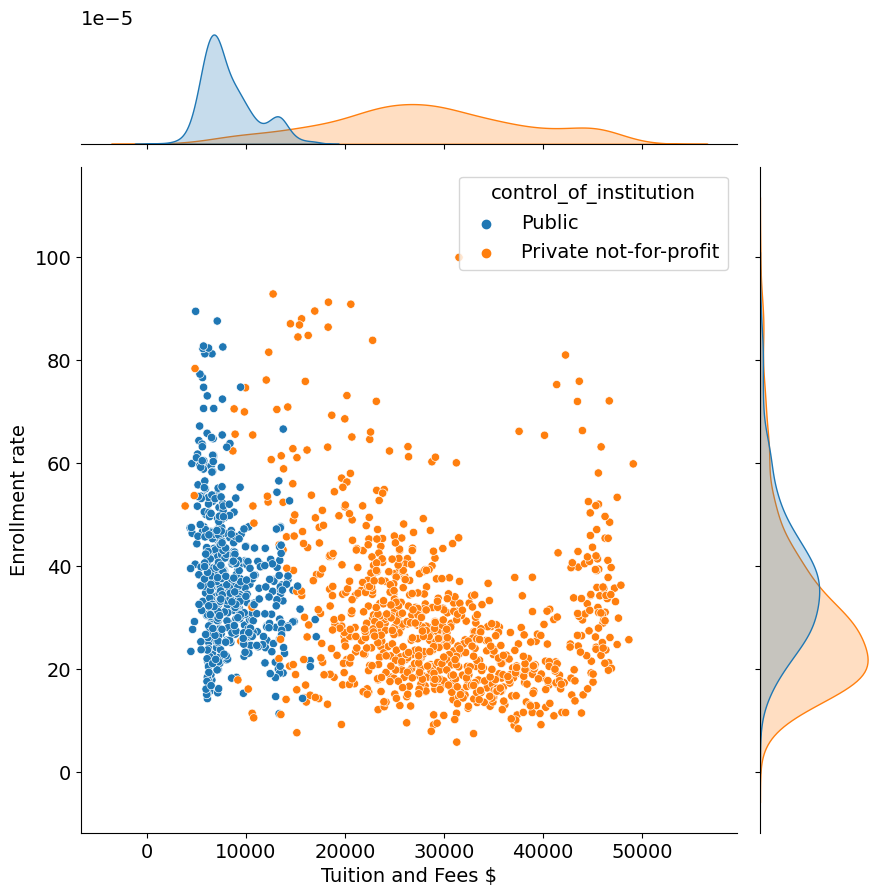

In [ ]:
g=sns.jointplot(x=univclean_df.tuition_and_fees_2013_14,y=univclean_df.enrollment_rate,hue=univclean_df.control_of_institution,height=9);
g=(g.set_axis_labels('Tuition and Fees $','Enrollment rate'))


The figure provides valuable insights into students' preferences regarding university choices based on tuition and fees. It highlights two crucial points:

Public universities tend to be more affordable compared to the majority of private universities. This cost advantage makes public universities an attractive option for many students.

There is a higher concentration of universities towards the left of the figure, indicating that more institutions have lower tuition and fees. Within this region, universities with more affordable tuition fees tend to have higher enrollment rates than the more expensive ones. This finding suggests that affordability plays a significant role in students' decisions, as they prefer universities with lower costs, leading to higher enrollment rates in those institutions.

Combining the insights from the previous findings, we can conclude that one of the reasons for students' preference for public universities is their affordability compared to many private universities. This data-driven conclusion sheds light on the factors influencing students' choices and provides valuable information for educational institutions to understand student preferences better.

# Q: Do students prefer a university for its low cost of on-campus living?.

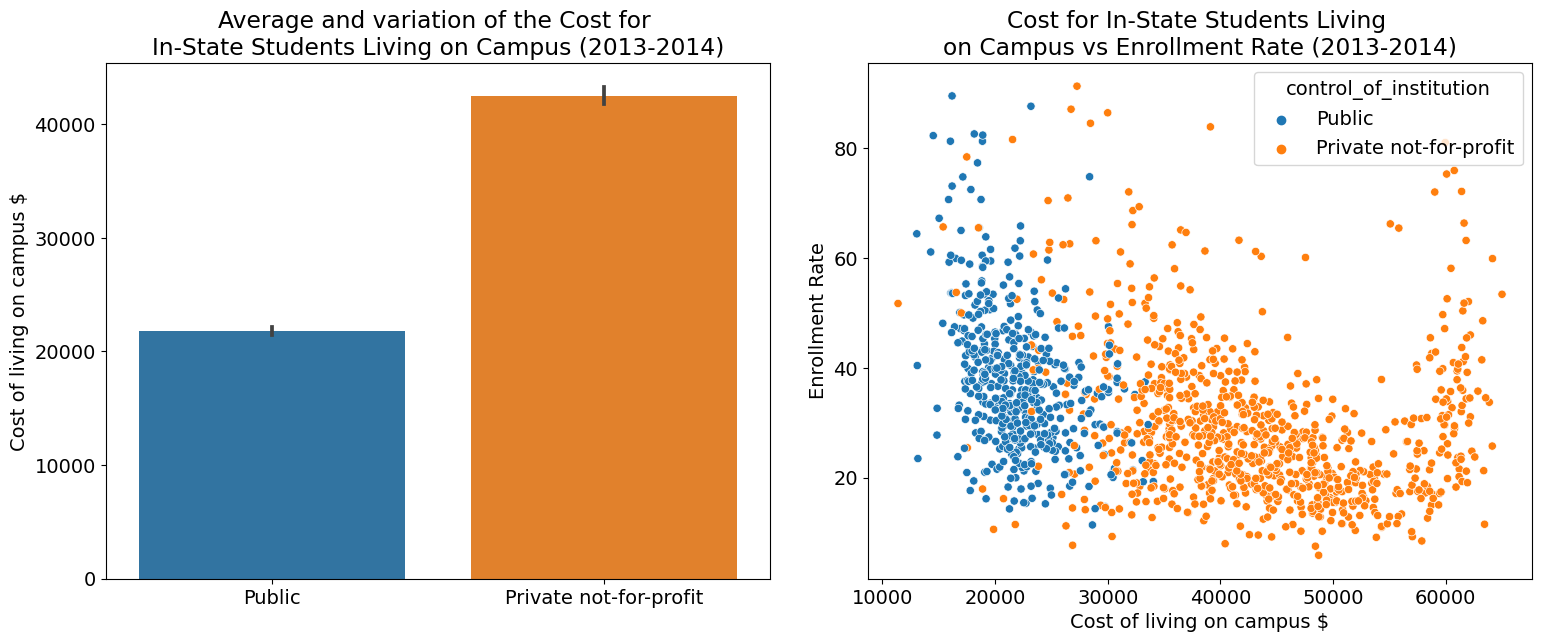

In [ ]:
plt.figure(figsize=(16,7))
plt.subplot(1,2,1)
sns.barplot(y=univclean_df.total_price_for_in_state_students_living_on_campus_2013_14,x=univclean_df.control_of_institution)
plt.title('''Average and variation of the Cost for
In-State Students Living on Campus (2013-2014)''')
plt.xlabel('')
plt.ylabel('Cost of living on campus $')

plt.subplot(1,2,2)
sns.scatterplot(x=univclean_df.total_price_for_in_state_students_living_on_campus_2013_14,y=univclean_df.enrollment_rate,hue=univclean_df.control_of_institution);
plt.title('''Cost for In-State Students Living
on Campus vs Enrollment Rate (2013-2014)''')
plt.xlabel('Cost of living on campus $')
plt.ylabel('Enrollment Rate')
plt.tight_layout(pad=2)

The data illustrates that the majority of public universities offer a substantially more affordable cost for in-state students compared to private universities. On average, the cost at public universities is approximately half that of private universities, making them a more budget-friendly option for many students.

The right figure further reinforces the importance of affordability in students' decisions. It shows a strong correlation between high enrollment rates and more affordable costs. This indicates that students do consider the cost of living on campus for in-state students as a crucial factor when selecting a university. Universities offering a more affordable cost of living tend to attract higher enrollment rates, suggesting that cost plays a significant role in shaping students' preferences.

By understanding the cost dynamics and its influence on student choices, educational institutions can better strategize their tuition and fees to appeal to prospective students and make informed decisions to improve student recruitment and enrollment rates

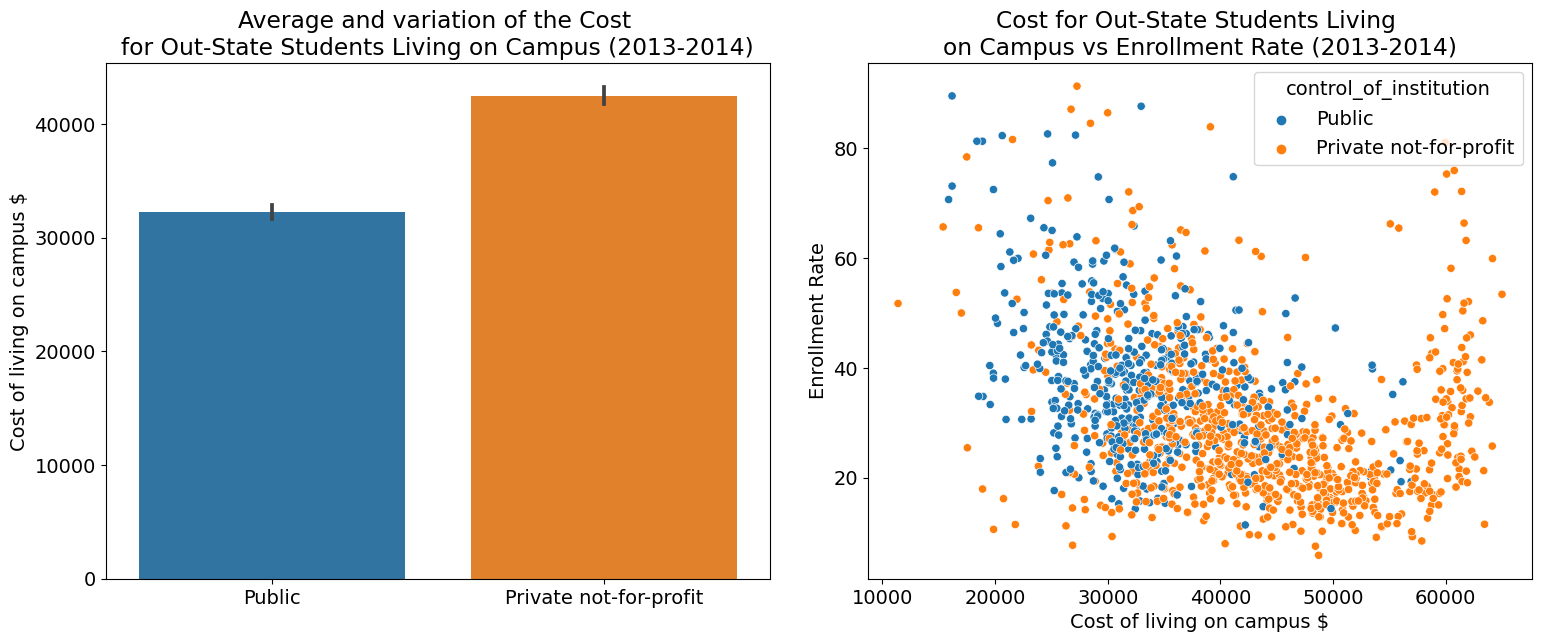

In [ ]:
plt.figure(figsize=(16,7))
plt.subplot(1,2,2)
sns.scatterplot(x=univclean_df.total_price_for_out_of_state_students_living_on_campus_2013_14,y=univclean_df.enrollment_rate,hue=univclean_df.control_of_institution);
plt.title('''Cost for Out-State Students Living
on Campus vs Enrollment Rate (2013-2014)''')
plt.xlabel('Cost of living on campus $')
plt.ylabel('Enrollment Rate')

plt.subplot(1,2,1)
sns.barplot(y=univclean_df.total_price_for_out_of_state_students_living_on_campus_2013_14,x=univclean_df.control_of_institution)
plt.title('''Average and variation of the Cost
for Out-State Students Living on Campus (2013-2014)''')
plt.xlabel('')
plt.ylabel('Cost of living on campus $')

plt.tight_layout(pad=2)

The data shows that, on average, the cost for out-state students at public universities is lower than that of private universities, once again highlighting the cost advantage of public institutions for both in-state and out-state students.

The right figure reaffirms the importance of affordability for out-state students as well. Just like in the case of in-state students, there is a strong correlation between high enrollment rates and more affordable costs for out-state students. This finding indicates that students, irrespective of their state residency, consider the cost of living on campus for out-state students when making their university choices.

Overall, these insights underline the significance of affordability in shaping students' preferences, regardless of whether they are in-state or out-state students. Universities offering more affordable options for both tuition and cost of living tend to attract higher enrollment rates, reinforcing the notion that cost plays a critical role in students' decision-making processe

can explore more ..... as per the information or insights we required. this is what data can do with the usage

Thankyou all,


---
YRC-RAKESH
